In [109]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Load the data and store it as a dataframe 
df = pd.read_csv('sample_data.csv')

# 1. Exploratory data analysis

## 1.1 Look through the data set

In [5]:
# Print out the shape of the data
df.shape  # the dataframe has 6539 rows and 106 columns

(6539, 106)

In [15]:
# Print out the first 3 rows of the data
df.head(3) # Have a brief look on the data

,entity,formattype,fromdate,titlecount,titles,todate,author,amazontotalreviews,minappleprice,amazontotalrevenue,...,lumpedpreorderrevenue,amazonsoldunits,amazonpreordersubscriptionrevenue,preordersubscriptionunits,amazonpreordersalesrevenue,maxappleprice,pagelength,pricewassetbypublisher,barnesandnobledistributor,appledistributor
0,Alone in the dark,print,20170418,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170419,Frith Banbury,306.0,0,0,...,0,6,0,0,0,0,NaN,NaN,NaN,NaN
1,Alone in the dark,print,20170419,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170420,Frith Banbury,306.0,0,702,...,0,7,0,0,0,0,NaN,NaN,NaN,NaN
2,Alone in the dark,print,20170420,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170421,Frith Banbury,306.0,0,4914,...,0,7,0,0,0,0,NaN,NaN,NaN,NaN


In [51]:
# Since there are two many features
# We need to check and deciside which to explore
# In this step we print out each column and corresponding unique value
for col in df.columns: 
    print(col) 
    print(df[col].unique())
    print('\n\n')
    

entity
['Alone in the dark' 'The Walking Dead']



formattype
['print' 'ebook' 'audio']



fromdate
[20170418 20170419 20170420 20170421 20170422 20170423 20170424 20170425
 20170426 20170427 20170428 20170429 20170430 20170501 20170502 20170503
 20170504 20170505 20170506 20170507 20170508 20170509 20170510 20170511
 20170512 20170513 20170514 20170515 20170520 20170521 20170522 20170523
 20170524 20170525 20170526 20170527 20170528 20170529 20170530 20170531
 20170601 20170602 20170603 20170604 20170605 20170606 20170607 20170608
 20170609 20170610 20170611 20170612 20170613 20170614 20170615 20170616
 20170617 20170618 20170619 20170620 20170621 20170622 20170623 20170624
 20170625 20170626 20170627 20170628 20170629 20170630 20170702 20170703
 20170704 20170705 20170706 20170707 20170708 20170709 20170710 20170711
 20170712 20170713 20170714 20170715 20170716 20170717 20170718 20170719
 20170720 20170721 20170722 20170723 20170724 20170725 20170726 20170727
 20170728 20170729 20170

## 1.2 Dealing with missing value

In [59]:
# Find some useful numerical data
# We get rid of some numerical data such as 'preorderunits','amazonlumpedpreordersalesrevenue'
# because almost all entry of such columns are 0
num_data = df[['amazontotalreviews','amazontotalrevenue','accruedpreordersoldunits',
              'maxprice','amazontotalunits','totalrevenue','amazonsubscriptionrevenue','maxlistprice',
              'applesoldunits','minamazonlistprice','minprice','accruedpreorderrevenue',
              'maxamazonlistprice','amazonaccruedpreorderrevenue','amazonaccruedpreorderunits','applesalesrevenue',
              'totalunits','maxamazonprice','accruedpreorderunits','amazonsalesrevenue','minlistprice','amazonaccruedpreordersalesrevenue',
              'minamazonprice','subscriptionunits','amazonaccruedpreordersoldunits','salesrevenue','subscriptionrevenue','soldunits','amazonsubscriptionunits','accruedpreordersalesrevenue','amazonsoldunits']]

In [62]:
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6539 entries, 0 to 6538
Data columns (total 31 columns):
amazontotalreviews                   6522 non-null float64
amazontotalrevenue                   6539 non-null int64
accruedpreordersoldunits             6539 non-null int64
maxprice                             6539 non-null int64
amazontotalunits                     6539 non-null int64
totalrevenue                         6539 non-null int64
amazonsubscriptionrevenue            6539 non-null int64
maxlistprice                         6539 non-null int64
applesoldunits                       6539 non-null int64
minamazonlistprice                   6539 non-null int64
minprice                             6539 non-null int64
accruedpreorderrevenue               6539 non-null int64
maxamazonlistprice                   6539 non-null int64
amazonaccruedpreorderrevenue         6539 non-null int64
amazonaccruedpreorderunits           6539 non-null int64
applesalesrevenue                   

- We find that only column 'amazontotalreviews' has null value. In order to get rid of null value, we use KNN method to do the data imputation on 'amazontotalreviews'

In [68]:
# Draw the corr matrix of the numerical data and find features relevant to amazontotalreviews  
# Use these features to do the prediction
num_data.corr().sort_values(by=['amazontotalreviews'], ascending=False).iloc[:,0]

amazontotalreviews                   1.000000
applesoldunits                      -0.049161
applesalesrevenue                   -0.049161
minlistprice                        -0.100379
minprice                            -0.117523
minamazonprice                      -0.117523
minamazonlistprice                  -0.119160
maxlistprice                        -0.120670
maxamazonlistprice                  -0.120670
maxamazonprice                      -0.121031
maxprice                            -0.122306
accruedpreorderrevenue              -0.125745
accruedpreordersalesrevenue         -0.125745
amazonaccruedpreordersalesrevenue   -0.125745
amazonaccruedpreorderrevenue        -0.125745
amazonaccruedpreorderunits          -0.145882
accruedpreorderunits                -0.145882
accruedpreordersoldunits            -0.145882
amazonaccruedpreordersoldunits      -0.145882
subscriptionunits                   -0.166543
amazonsubscriptionunits             -0.166543
subscriptionrevenue               

In [101]:
# Use Knn impute the null value
from sklearn.neighbors import KNeighborsRegressor
imputer = KNeighborsRegressor(n_neighbors=1) 
with_amazontotalreviews = num_data[num_data.amazontotalreviews.isnull()==False]
with_null_amazontotalreviews = num_data[num_data.amazontotalreviews.isnull()==True]

# Using a regression algorithm with the variables 4 most relevant features 
# Train the model
cols = ['amazontotalrevenue', 'totalrevenue','amazonsalesrevenue','salesrevenue']
imputer.fit(with_amazontotalreviews[cols], with_amazontotalreviews.amazontotalreviews)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [102]:
# See the missing data
with_null_amazontotalreviews

,amazontotalreviews,amazontotalrevenue,accruedpreordersoldunits,maxprice,amazontotalunits,totalrevenue,amazonsubscriptionrevenue,maxlistprice,applesoldunits,minamazonlistprice,...,amazonaccruedpreordersalesrevenue,minamazonprice,subscriptionunits,amazonaccruedpreordersoldunits,salesrevenue,subscriptionrevenue,soldunits,amazonsubscriptionunits,accruedpreordersalesrevenue,amazonsoldunits
1540,NaN,5592,0,799,8,5592,0,799,0,799,...,0,699,0,0,5592,0,8,0,0,8
1553,NaN,4194,0,799,6,4194,0,799,0,799,...,0,699,0,0,4194,0,6,0,0,6
1576,NaN,7689,0,799,11,7689,0,799,0,799,...,0,699,0,0,7689,0,11,0,0,11
1577,NaN,0,0,799,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1681,NaN,4194,0,799,6,4194,0,799,0,799,...,0,699,0,0,4194,0,6,0,0,6
4354,NaN,3574,0,1787,2,3574,0,0,0,0,...,0,0,0,0,3574,0,2,0,0,2
4849,NaN,2997,0,999,3,2997,0,0,0,0,...,0,999,0,0,2997,0,3,0,0,3
4850,NaN,6993,0,999,7,9990,0,0,3,0,...,0,999,0,0,9990,0,10,0,0,7
4851,NaN,9990,0,999,10,14985,0,0,5,0,...,0,999,0,0,14985,0,15,0,0,10
4852,NaN,10989,0,999,11,20979,0,0,10,0,...,0,999,0,0,20979,0,21,0,0,11


In [103]:
# Replace the mising values 'amazontotalreviews':
pd.options.mode.chained_assignment = None
new_values = imputer.predict(with_null_amazontotalreviews[cols])
with_null_amazontotalreviews.loc[:,'amazontotalreviews'] = new_values
with_null_amazontotalreviews

,amazontotalreviews,amazontotalrevenue,accruedpreordersoldunits,maxprice,amazontotalunits,totalrevenue,amazonsubscriptionrevenue,maxlistprice,applesoldunits,minamazonlistprice,...,amazonaccruedpreordersalesrevenue,minamazonprice,subscriptionunits,amazonaccruedpreordersoldunits,salesrevenue,subscriptionrevenue,soldunits,amazonsubscriptionunits,accruedpreordersalesrevenue,amazonsoldunits
1540,328.0,5592,0,799,8,5592,0,799,0,799,...,0,699,0,0,5592,0,8,0,0,8
1553,324.0,4194,0,799,6,4194,0,799,0,799,...,0,699,0,0,4194,0,6,0,0,6
1576,320.0,7689,0,799,11,7689,0,799,0,799,...,0,699,0,0,7689,0,11,0,0,11
1577,279.0,0,0,799,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1681,324.0,4194,0,799,6,4194,0,799,0,799,...,0,699,0,0,4194,0,6,0,0,6
4354,243.0,3574,0,1787,2,3574,0,0,0,0,...,0,0,0,0,3574,0,2,0,0,2
4849,330.0,2997,0,999,3,2997,0,0,0,0,...,0,999,0,0,2997,0,3,0,0,3
4850,260.0,6993,0,999,7,9990,0,0,3,0,...,0,999,0,0,9990,0,10,0,0,7
4851,235.0,9990,0,999,10,14985,0,0,5,0,...,0,999,0,0,14985,0,15,0,0,10
4852,232.0,10989,0,999,11,20979,0,0,10,0,...,0,999,0,0,20979,0,21,0,0,11


In [105]:
# Combine the data back together
# At last we impute the null value
num_data = with_amazontotalreviews.append(with_null_amazontotalreviews)
num_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6539 entries, 0 to 4859
Data columns (total 31 columns):
amazontotalreviews                   6539 non-null float64
amazontotalrevenue                   6539 non-null int64
accruedpreordersoldunits             6539 non-null int64
maxprice                             6539 non-null int64
amazontotalunits                     6539 non-null int64
totalrevenue                         6539 non-null int64
amazonsubscriptionrevenue            6539 non-null int64
maxlistprice                         6539 non-null int64
applesoldunits                       6539 non-null int64
minamazonlistprice                   6539 non-null int64
minprice                             6539 non-null int64
accruedpreorderrevenue               6539 non-null int64
maxamazonlistprice                   6539 non-null int64
amazonaccruedpreorderrevenue         6539 non-null int64
amazonaccruedpreorderunits           6539 non-null int64
applesalesrevenue                   

## 1.3 Data visuliztion

In [132]:
# Draw the heat map for these numerical data
# Since the amount of is too huge, we seperate it into 3 part randomly
# Then draw the heat map for each
import random
labels = list(num_data.columns)
label1 = random.sample(labels,k=10)
label2 = random.sample(list(set(labels) - set(label1)),k=10)
label3 =  random.sample(list(set(labels) - set(label2)-set(label1)),k=10)


def heat_map(label):
    plt.figure(figsize=(10,10))
    plt.title('Correlation of Features', fontsize=10)
    sns.heatmap(num_data[label].astype(float).corr(),cmap="YlGnBu",
                vmax=1.0, square=True,annot=True)
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

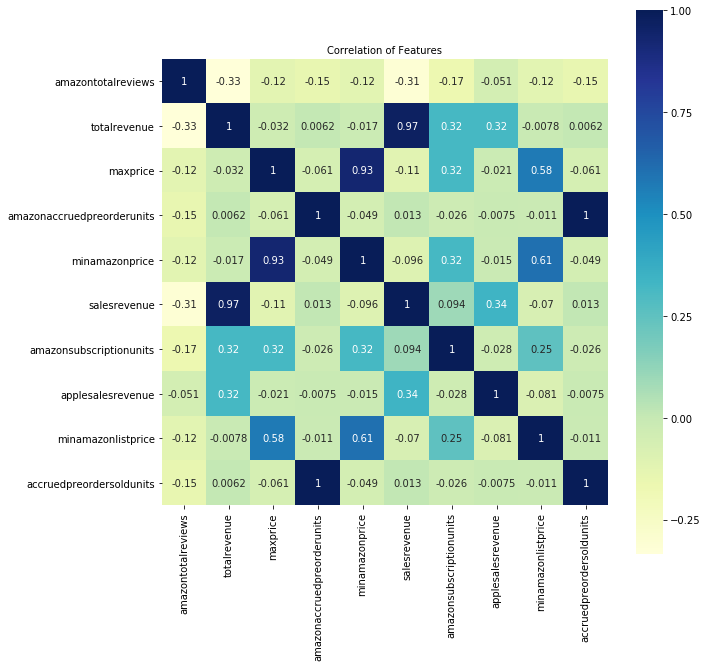

In [133]:
heat_map(label1)

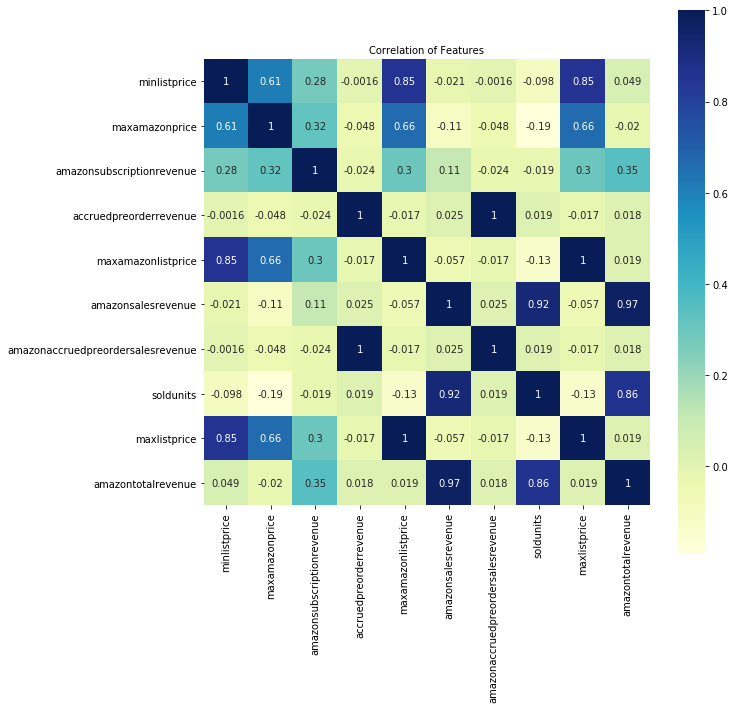

In [134]:
heat_map(label2)

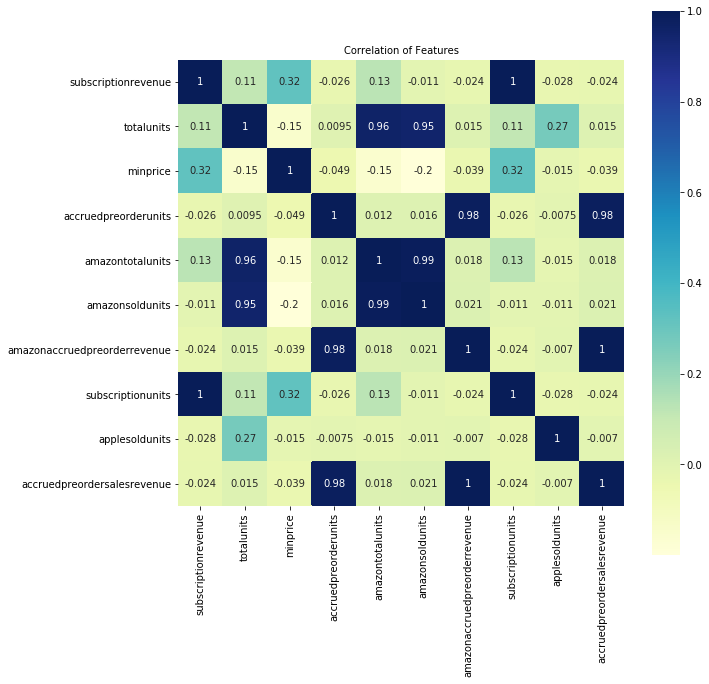

In [136]:
heat_map(label3)

### Conclusion: the aim to visualize these features is to find any strong relationship between features. When we are buliding the model, we should get rid of the infect of these strong relationship
- Highly strong positive:
  - ('salesrevenue','totalrevenue')
  - ('minamazonprice','maxprice')
  - ('amazonaccruedpreorderunits','accruedpreordersoldunits')
  - ('maxamazonlistprice','minlistprice','maxlistprice','maxamazonprice','maxamazonlistprice')
  - ('amazonaccruedpreordersalesrevenue','accruedpreorderrevenue')
  - ('soldunits','amazontotalrevenue','amazonsalesrevenue')
  - ('subscriptionrevenue','subscriptionunits')
  - ('amazontotalunits','amazonsoldunits','totalunits')
  - ('amazonaccruedpreorderrevenue','accruedpreorderunits','accruedpreordersalesrevenue')


# 2. Build on some model and analysis

## 2.1 Apply linear regression 
- We choose the target variable as 'subscriptionrevenue'. The reason why we choose this variable is that this data is important for a product, which indicate big role in business
- We use linear regression to deal with this problem
- Basing on the result in heatmap, we select part of features to fit the model

In [161]:
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS
X_1 = num_data[['amazontotalrevenue','maxamazonprice','minamazonprice','totalrevenue',
               'maxprice','maxlistprice','maxamazonlistprice','minlistprice','minamazonlistprice',
                'amazontotalreviews']]
y_1 = num_data['subscriptionrevenue']
reg = LinearRegression().fit(X_1, y_1)
reg.score(X_1,y_1)
OLS(y_1,X_1).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     subscriptionrevenue   R-squared (uncentered):                   0.304
Model:                             OLS   Adj. R-squared (uncentered):              0.303
Method:                  Least Squares   F-statistic:                              316.4
Date:                 Tue, 03 Mar 2020   Prob (F-statistic):                        0.00
Time:                         04:31:16   Log-Likelihood:                         -66805.
No. Observations:                 6539   AIC:                                  1.336e+05
Df Residuals:                     6530   BIC:                                  1.337e+05
Df Model:                            9                                                  
Covariance Type:             nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
amazontotalrevenue     0.0837      0.008     10.488      0.000       0.068       0.099
maxamazonprice        -4.9030      4.731     -1.036      0.300     -14.177       4.371
minamazonprice         1.8320      0.459      3.994      0.000       0.933       2.731
totalrevenue          -0.0093      0.008     -1.226      0.220      -0.024       0.006
maxprice               5.8345      4.723      1.235      0.217      -3.423      15.092
maxlistprice           1.1868      0.149      7.940      0.000       0.894       1.480
maxamazonlistprice     1.1868      0.149      7.940      0.000       0.894       1.480
minlistprice           2.1998      0.598      3.678      0.000       1.027       3.372
minamazonlistprice    -3.1378      0.646     -4.855      0.000      -4.405      -1.871
amazontotalreviews   -12.1688      0.742    -16.407      0.000     -13.623     -10.715
==============================================================================
Omnibus:                     9081.953   Durbin-Watson:                   0.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8215861.666
Skew:                           7.573   Prob(JB):                         0.00
Kurtosis:                     175.989   Cond. No.                     2.03e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.23e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- ### The p_value of regression report above show shat 'totalrevenue', 'maxamazonprice' and 'maxprice' are not significant. 
- ### To improve our linear model, we get rid of these three features:


In [164]:
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS
X_2 = num_data[['amazontotalrevenue','minamazonprice',
               'maxlistprice','maxamazonlistprice','minlistprice','minamazonlistprice',
                'amazontotalreviews']]
y_2 = num_data['subscriptionrevenue']
reg = LinearRegression().fit(X_2, y_2)
reg.score(X_2,y_2)
OLS(y_2,X_2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     subscriptionrevenue   R-squared (uncentered):                   0.303
Model:                             OLS   Adj. R-squared (uncentered):              0.302
Method:                  Least Squares   F-statistic:                              473.3
Date:                 Tue, 03 Mar 2020   Prob (F-statistic):                        0.00
Time:                         04:39:09   Log-Likelihood:                         -66808.
No. Observations:                 6539   AIC:                                  1.336e+05
Df Residuals:                     6533   BIC:                                  1.337e+05
Df Model:                            6                                                  
Covariance Type:             nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
amazontotalrevenue     0.0747      0.003     29.101      0.000       0.070       0.080
minamazonprice         2.6028      0.203     12.835      0.000       2.205       3.000
maxlistprice           1.2746      0.144      8.830      0.000       0.992       1.558
maxamazonlistprice     1.2746      0.144      8.830      0.000       0.992       1.558
minlistprice           1.6488      0.318      5.191      0.000       1.026       2.271
minamazonlistprice    -2.7031      0.403     -6.708      0.000      -3.493      -1.913
amazontotalreviews   -11.5653      0.690    -16.768      0.000     -12.917     -10.213
==============================================================================
Omnibus:                     9071.344   Durbin-Watson:                   0.555
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8163828.254
Skew:                           7.557   Prob(JB):                         0.00
Kurtosis:                     175.439   Cond. No.                     1.51e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.69e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- #### Now the new linear model is significant. The coef can tell us the simple relationship between 'subscriptionrevenue' and its features. For instance, fix others variable, when 'amazontotalreviews' add 1 unit, then the 'subscriptionrevenue' may probably decrease 11.6
- #### Moreover for linear model:
  - #### The R-squared is only 0.303, which is not high enough for a linear model
  - #### In order to improve the linear model, we may add some intersection term or quadratic term to the model and see the performance

## 2.2 Build a classifier
- We choose the target value as the 'entity'
- 'entity' has two value:
  - 'The Walking Dead' 
  - 'Alone in the dark'
- This is a binary classification

In [168]:
# See the distribution of y
# Since the distribution is uniform
# We can use accuracy to evaluate the model
df['entity'].value_counts()

The Walking Dead     3499
Alone in the dark    3040
Name: entity, dtype: int64

In [172]:
# Encoding the label y
replace_map = {'entity': {'The Walking Dead': 0, 'Alone in the dark': 1}}
df_c = df.copy()
df_c.replace(replace_map, inplace=True)
y = df_c['entity'] 

In [175]:
from sklearn.model_selection import train_test_split # Import train_test_split function
# From the above we select the features as
X = num_data[['amazontotalrevenue','minamazonprice',
               'maxlistprice','maxamazonlistprice','minlistprice','minamazonlistprice',
                'amazontotalreviews']]
# Split dataset into training set and test set using the ratio 70% to 30%
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

## 2.2.1 Use Logistic Regression classifier
- The main reason to use Logistic Regression is because this is a binary classification
- We use the l2 norm penalty to avoid overfitting
- We choose liblinear as our solver because this is a small data set
- We choose C=1,C is the coefficient of penalty

In [203]:
# Import Logistic Regression classifier
# Training the model
from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression(penalty='l2', C=1, solver='liblinear',max_iter=1000,random_state=0)
clf.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [220]:
# Model evaluation
from sklearn import metrics
def evalution(y_test,classifier):
    y_pred = classifier.predict(X_test)
    y_score = classifier.predict_proba(X_test)[:, 1]
    acc = metrics.accuracy_score(y_test,y_pred)
    auc = metrics.roc_auc_score(y_test,y_score)
    confusion = metrics.confusion_matrix(y_test,y_pred)
    print('1. Accuracy is: \n'+ str(acc))
    print('\n')
    print('2. The area under the ROC curve is: \n' + str(auc))
    print('\n')
    print('3. The confusion matrix is:')
    print(confusion)
    print('\n')
    print('4. The ROC curve:')
    fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, y_score)
    plt.figure(figsize=(8,10))
    plt.plot(fpr1, tpr1,label="Logistic_Regression_L2")
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate ')
    plt.ylabel('True Positive Rate ')
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--',label="Random")
    plt.axes().set_aspect('equal')
    plt.grid(True)
    plt.legend()
    plt.show()
    print('\n')
    print('5. The precision-recall curves: ')
    precision, recall, thresholds = metrics.precision_recall_curve(y_test,y_score)
    plt.figure(figsize=(8,8))
    plt.step(recall, precision, color='r', alpha=0.2,where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,color='g')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.axes().set_aspect('equal')
    plt.grid(True)
    plt.show()

1. Accuracy is: 
0.9240570846075433


2. The area under the ROC curve is: 
0.9689749778676066


3. The confusion matrix is:
[[946 102]
 [ 47 867]]


4. The ROC curve:


/Users/lilinsen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


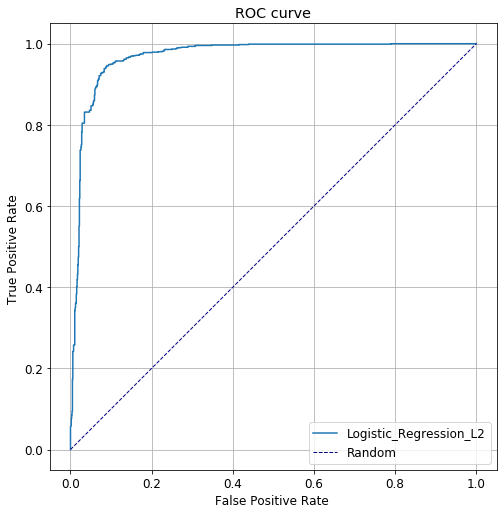



5. The precision-recall curves: 


/Users/lilinsen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


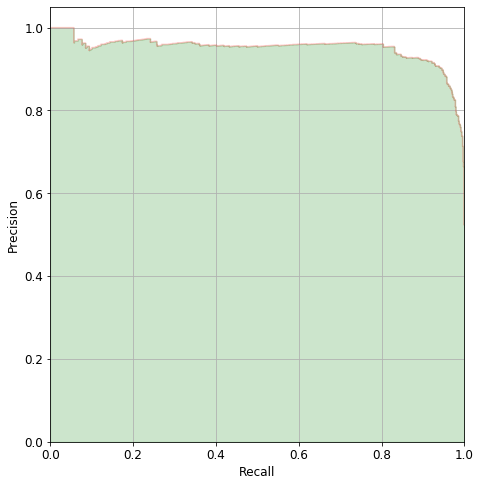

In [221]:
evalution(y_test,clf)

### Conclusion:  the evaluation of this model is good: the accuracy is 0.924 and auc is 0.97. Also the model performs well in ROC curve and precision-recall curves.

## 2.2.2 Training a Neural network 
- We use keras sequence model to implement this
- We use drop out to avoid overfitting
- We tune the structure of the neural network, including the layers size, layers numbers.So, the result showing below is the neural network that I have optimized 

In [273]:
# First print out the shape of the data
print('Shape of x_train: ' + str(X_train.shape))
print('Shape of x_test: ' + str(X_test.shape))
print('Shape of y_train: ' + str(y_train.shape))
print('Shape of y_test: ' + str(y_test.shape))

Shape of x_train: (4577, 7)
Shape of x_test: (1962, 7)
Shape of y_train: (4577,)
Shape of y_test: (1962,)


In [357]:
# Build the Neural network 
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical
network = models.Sequential()
network.add(layers.Dense(1024, activation='relu', input_shape=(7,)))
network.add(layers.Dense(1024, activation='relu'))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(1, activation='sigmoid'))
network.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [358]:
# See the structure of the neural network
network.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_98 (Dense)             (None, 1024)              8192      
_________________________________________________________________
dense_99 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_31 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_100 (Dense)            (None, 1)                 1025      
Total params: 1,058,817
Trainable params: 1,058,817
Non-trainable params: 0
_________________________________________________________________


In [359]:
history = network.fit(X_train, y_train ,validation_split=0.33, epochs=100, batch_size=128)

Train on 3066 samples, validate on 1511 samples
Epoch 1/100
3066/3066 [==============================] - 1s 244us/step - loss: 357.5248 - accuracy: 0.7185 - val_loss: 157.8452 - val_accuracy: 0.7604
Epoch 2/100
3066/3066 [==============================] - 0s 139us/step - loss: 121.0802 - accuracy: 0.7639 - val_loss: 106.9714 - val_accuracy: 0.7637
Epoch 3/100
3066/3066 [==============================] - 0s 141us/step - loss: 67.3358 - accuracy: 0.7860 - val_loss: 66.3683 - val_accuracy: 0.8015
Epoch 4/100
3066/3066 [==============================] - 0s 134us/step - loss: 35.3216 - accuracy: 0.8020 - val_loss: 24.7786 - val_accuracy: 0.8551
Epoch 5/100
3066/3066 [==============================] - 0s 127us/step - loss: 21.5136 - accuracy: 0.8376 - val_loss: 21.3602 - val_accuracy: 0.8372
Epoch 6/100
3066/3066 [==============================] - 0s 124us/step - loss: 10.6789 - accuracy: 0.8588 - val_loss: 7.0766 - val_accuracy: 0.9100
Epoch 7/100
3066/3066 [==============================] 

Epoch 56/100
3066/3066 [==============================] - 0s 123us/step - loss: 0.2200 - accuracy: 0.9129 - val_loss: 0.2339 - val_accuracy: 0.9232
Epoch 57/100
3066/3066 [==============================] - 0s 137us/step - loss: 0.1927 - accuracy: 0.9185 - val_loss: 0.2252 - val_accuracy: 0.9212
Epoch 58/100
3066/3066 [==============================] - 0s 121us/step - loss: 0.2012 - accuracy: 0.9126 - val_loss: 0.2464 - val_accuracy: 0.9133
Epoch 59/100
3066/3066 [==============================] - 0s 123us/step - loss: 0.2010 - accuracy: 0.9152 - val_loss: 0.2231 - val_accuracy: 0.9246
Epoch 60/100
3066/3066 [==============================] - 0s 124us/step - loss: 0.1858 - accuracy: 0.9250 - val_loss: 0.2445 - val_accuracy: 0.9173
Epoch 61/100
3066/3066 [==============================] - 0s 121us/step - loss: 0.1935 - accuracy: 0.9198 - val_loss: 0.2232 - val_accuracy: 0.9166
Epoch 62/100
3066/3066 [==============================] - 0s 127us/step - loss: 0.1880 - accuracy: 0.9295 - val_

In [360]:
# Report the test accuracy
test_loss, test_acc = network.evaluate(X_test, y_test)
print('test_acc', test_acc)

1962/1962 [==============================] - 0s 77us/step
test_acc 0.9602446556091309


### The test accuray of neural network is 0.96, which is higher than 0.924(the logistic regression)

## 2.2.3 Compare the logistic regression and nerual network
- Roc curve
- Rrecision-recall curves

1962/1962 [==============================] - 0s 57us/step


/Users/lilinsen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


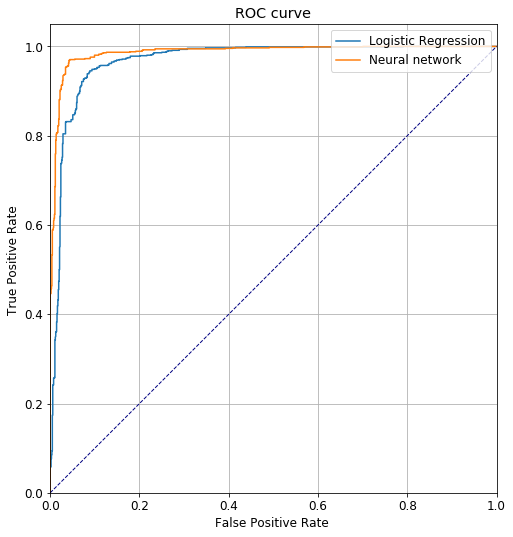

In [374]:
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:, 1]
y_pred_NN = network.predict(X_test, batch_size=64, verbose=1)
# Roc curve
fpr1, tpr1, thresholds1  = metrics.roc_curve(y_test,y_score, pos_label=None, sample_weight=None, drop_intermediate=True)
fpr2, tpr2, thresholds2  = metrics.roc_curve(y_test,y_pred_NN, pos_label=None, sample_weight=None, drop_intermediate=True)

plt.figure(figsize=(8,10))
plt.plot(fpr1, tpr1,label="Logistic Regression")
plt.plot(fpr2, tpr2,label="Neural network")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

/Users/lilinsen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


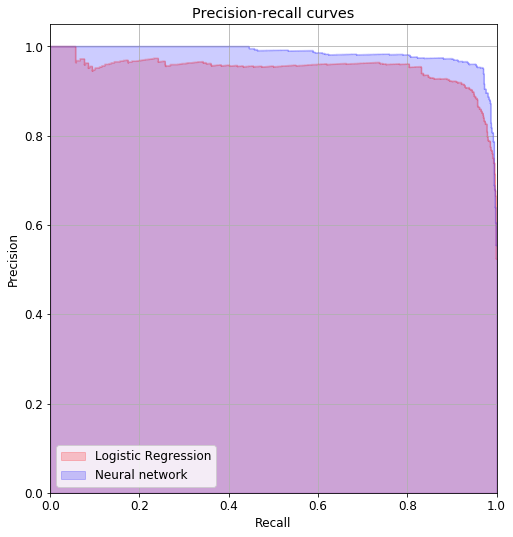

In [375]:
# precision_recall_curve
precision1, recall1, thresholds1 = metrics.precision_recall_curve(y_test,y_score)
precision2, recall2, thresholds2 = metrics.precision_recall_curve(y_test,y_pred_NN)
plt.figure(figsize=(8,10))
plt.step(recall1, precision1, color='r', alpha=0.2,where='post' )
plt.fill_between(recall1, precision1, step='post', alpha=0.2,color='r',label="Logistic Regression")
plt.step(recall2, precision2, color='b', alpha=0.2,where='post')
plt.fill_between(recall2, precision2, step='post', alpha=0.2,color='b',label="Neural network")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-recall curves')
plt.axes().set_aspect('equal')
plt.grid(True)
plt.legend()
plt.show()

### Conclusion: the two curve above both show that the neural network performs better than logistic regression

## 2.2.4 Conclusion for classification
- In this binary classification problem:
   - 'The Walking Dead' or 'Alone in the dark'
   -  We use two methods (logistic and neural network) to implement it
   -  At last we find neural network performs better than logistic 
   - The accuracy of our neural network model is 0.96

# 3. Conclusion
- The whole project contains two parts:
   - EDA part
   - Machine learning part:
    - Linear regression problem
    - Classification problem
       - Logistic regression
       - Deep neural network